# Car Price Prediction



__Using__ 

__1) Multiple Regression__

__2) Random Forest Regressor__

__Importing the Libraries__

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/ML Projects/Car Price Prediction/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


__Data Analysis__

In [3]:
df.info()  # to see into the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.isnull().sum()    # to check is there is missing values or not 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df=df.sample(frac=1).reset_index(drop=True)

In [7]:
print(df['fuel'].unique())
print()
print(df['year'].unique())
print()
print(df['seller_type'].unique())
print()
print(df['transmission'].unique())
print()
print(df['owner'].unique())

['Diesel' 'CNG' 'Petrol' 'LPG' 'Electric']

[2016 2009 2007 2015 2013 2011 2012 2008 2014 2018 2019 2017 2002 2010
 2005 2003 2006 2004 2000 2001 2020 1998 1992 1997 1999 1996 1995]

['Individual' 'Trustmark Dealer' 'Dealer']

['Manual' 'Automatic']

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


__Now to analyze the selling price and km_driven first__

In [8]:
df['km_driven'].max()

806599

In [9]:
df1=df[['selling_price','km_driven']]
bins=np.arange(0,80000,10000)
groups=df1.groupby(pd.cut(df['km_driven'],bins)).mean()

Text(0, 0.5, 'selling_price')

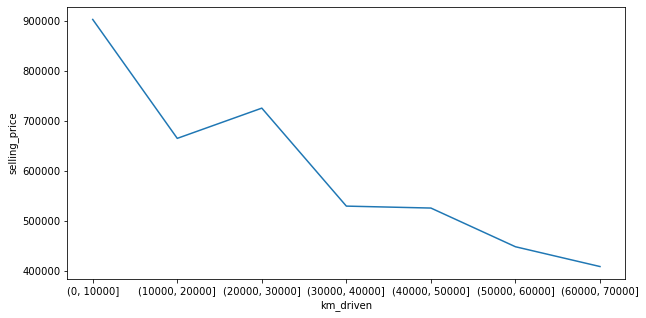

In [10]:
plt.figure(figsize=(10,5))
groups['selling_price'].plot(kind='line')
plt.ylabel('selling_price')

So by this we can see that cars having less km_driven have the more selling price

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

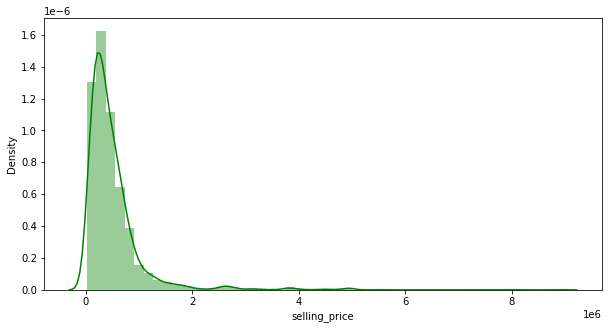

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df['selling_price'],color='green')

## Encoding the variables 

In [12]:
dict_fuel={'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}
dict_sellertype={'Individual':0,'Dealer':1,'Trustmark Dealer':2}
dict_transmission={'Manual':0,'Automatic':1}
dict_owner={'First Owner':0,'Second Owner':1,'Fourth & Above Owner':2,'Third Owner':3,'Test Drive Car':4}
df['fuel']=df['fuel'].map(dict_fuel)
df['seller_type']=df['seller_type'].map(dict_sellertype)
df['transmission']=df['transmission'].map(dict_transmission)
df['owner']=df['owner'].map(dict_owner)

In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Hyundai i20 Asta 1.4 CRDi,2016,430000,80000,1,0,0,0
1,Maruti Wagon R LXI CNG,2016,325000,80000,2,0,0,1
2,Honda City 1.5 V MT,2009,250000,90000,0,0,0,1
3,Maruti Wagon R VXI Minor,2007,80000,60000,0,0,0,3
4,Mahindra NuvoSport N8,2016,525000,110000,1,0,0,0


In [14]:
feature_values=df.drop(['name','selling_price'],axis=1)
feature_values.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2016,80000,1,0,0,0
1,2016,80000,2,0,0,1
2,2009,90000,0,0,0,1
3,2007,60000,0,0,0,3
4,2016,110000,1,0,0,0


In [15]:
target_values=df['selling_price']
target_values.head()

0    430000
1    325000
2    250000
3     80000
4    525000
Name: selling_price, dtype: int64

## Standardaize the  Variables

In [16]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
feature_values_scaled=scale.fit_transform(feature_values)

## Train/Test Split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(feature_values_scaled,target_values,test_size=0.1,random_state=2)

In [18]:
X_train.shape

(3906, 6)

In [19]:
X_test.shape

(434, 6)

## 1) Multiple Regression

The variables in the multiple regession should have the constant 
intercept [1]

In [20]:
X_train=sm.add_constant(X_train)  
X_test=sm.add_constant(X_test)
print(X_train.shape)
print(X_test.shape)

(3906, 7)
(434, 7)


In [21]:
print(X_train[0])  # with the intercept
print()
print(X_test[0])

[ 1.          0.92748471 -0.8837243   0.85280178 -0.5555905  -0.33927557
 -0.59640154]

[ 1.          0.69022881 -0.8909715  -0.9668441   1.45714971 -0.33927557
 -0.59640154]


In [22]:
model_multiple=sm.OLS(y_train,X_train).fit()
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     499.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:55:02   Log-Likelihood:                -56226.
No. Observations:                3906   AIC:                         1.125e+05
Df Residuals:                    3899   BIC:                         1.125e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+05   6916.715     72.552      0.0

__By this model summary we can analyze the lot of things of the model__


-The variables that has the max cofficient will impact the model more 


-The vaiables x2,x6 will decrease as the target variable increases


In [23]:
# Now predicting the values 
predict=model_multiple.predict(X_test)

## Analyzing the model 

In [27]:
metrics.r2_score(y_test,predict)

0.4883880645922358

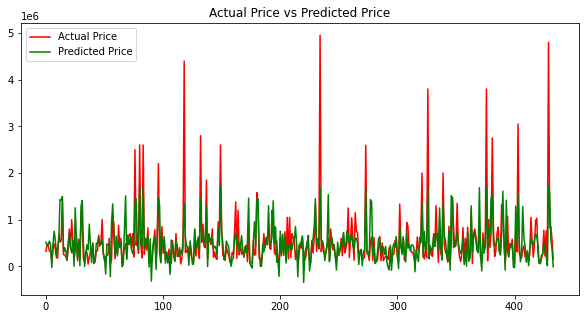

In [28]:
y_test=list(y_test)
plt.figure(figsize=(10,5))
plt.plot(y_test,color='red',label='Actual Price')
plt.plot(predict,color='green',label='Predicted Price')
plt.legend()
plt.title('Actual Price vs Predicted Price')
plt.show()

__So the predicted values of the model is not so great__

## 2) Random Forest Regressor

In [31]:
model_random=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [32]:
predict_rand=model_random.predict(X_test)

In [33]:
metrics.r2_score(y_test,predict_rand)

0.6739683635675333

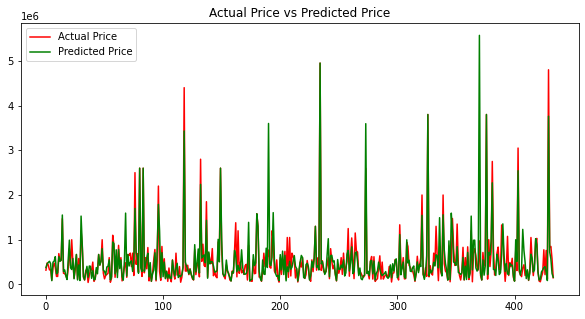

In [34]:
plt.figure(figsize=(10,5))
plt.plot(y_test,color='red',label='Actual Price')
plt.plot(predict_rand,color='green',label='Predicted Price')
plt.legend()
plt.title('Actual Price vs Predicted Price')
plt.show()

__The 'Predicted Price' is close to 'Actual Price' of the car__

Conclusion : The __Random Forest Regressor__ is predicting the better score than the __Multiple Regression__